# Accessing Global Height data from Microsoft Planetary Computer

Set-up the pystac client to access the Microsoft Planetary Computer catalog

In [1]:
from pystac_client import Client
import planetary_computer

catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

Define collection and assets to retrieve and construct [STAC API filters](https://github.com/stac-api-extensions/filter) for efficient query performance against Planetary Computer API

In [ ]:
collections = ["met-office-global-deterministic-height"]
asset_id = "cloud_amount_on_height_levels"
forecast_extension_filters = {
    "op": "and",
    "args": [
        {
            "op": "=",
            "args": [
                {"property": "forecast:reference_datetime"},
                "2026-01-14T12:00:00Z",
            ],
        },
        {"op": "=", "args": [{"property": "forecast:horizon"}, "PT0144H00M"]},
    ],
}

Search Planetary Computer catalog for STAC items and retrieve STAC Asset URL

In [ ]:
search = catalog.search(
    collections=collections, filter_lang="cql2-json", filter=forecast_extension_filters
)

items = search.item_collection()
asset_url = items.items[0].assets[asset_id].href

Example usage: Plot NetCDF data

/var/folders/yp/d6xvrkd943dgvqg5s9cpymc40000gn/T/ipykernel_52053/4283676169.py:5: FutureWarning: In a future version, xarray will not decode the variable 'forecast_period' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  example_netcdf = xr.open_dataset(fsspec.open(asset_url, expand=True).open())


(array([1.1830823e+08, 4.1727080e+06, 3.3227110e+06, 2.9464680e+06,
        2.9334310e+06, 3.5162350e+06, 3.6568460e+06, 3.9844160e+06,
        4.1094160e+06, 1.5251139e+07]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.90000004,
        1.        ]),
 <BarContainer object of 10 artists>)

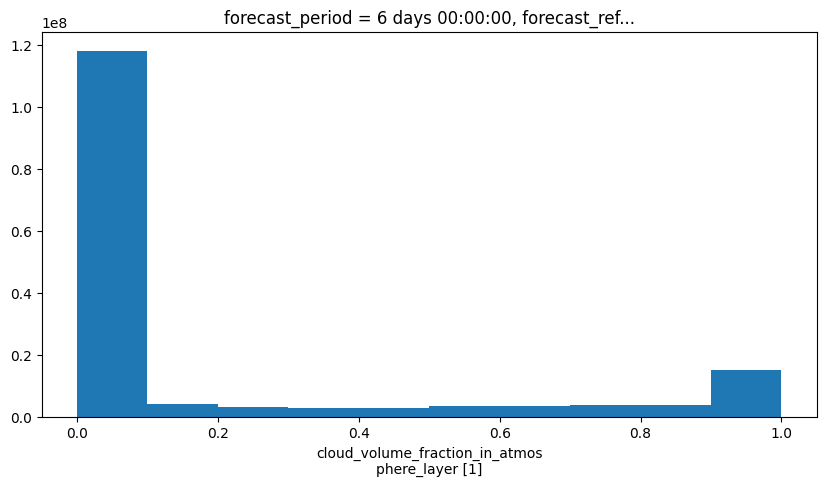

In [4]:
import fsspec
import xarray as xr
import matplotlib.pyplot as plt

example_netcdf = xr.open_dataset(fsspec.open(asset_url, expand=True).open())
plt.figure(figsize=(10, 5))
example_netcdf["cloud_volume_fraction_in_atmosphere_layer"].plot()